<a href="https://colab.research.google.com/github/christakahashi/ECE447/blob/master/lectures/sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 447: Sensitivity
===

Updated by 
 Dr. Chris Takahashi

Authored by Prof. Eric Klavins &copy; 2019, University of Washington


# Code

In [0]:
import numpy as np
import scipy.integrate as spi
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

#comment out for light mode
plt.style.use('dark_background')

# Definitions

Sensitivity is about how much a given quantity changes when some other quantity changes. It is simple concept graphically:

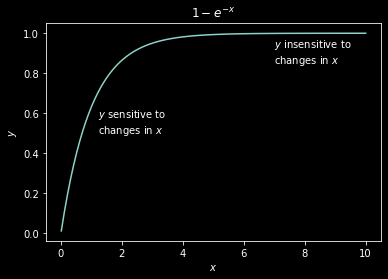

In [10]:
x = np.linspace(0.01,10,100)
plt.plot(t,1-np.exp(-x));
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.text(1.2,0.5,"$y$ sensitive to\nchanges in $x$",horizontalalignment='left')
plt.text(7,0.85,"$y$ insensitive to\nchanges in $x$",horizontalalignment='left')
plt.title("$1-e^{-x}$");

Formally, we define the sensitivity of a value $y$ to changes in $x$ by

\begin{align}
\mathrm{Sensitivity} = \frac{\mathrm{\%\;change\;in\;y}}{\mathrm{\%\;change\;in\;x}}
                     = \frac{\Delta y / y}{\Delta x / x} 
                     = \frac{\Delta y}{\Delta x} \frac{x}{y}
\end{align}

Taking the limit we get

$$
S^y_x = \frac{\partial y}{\partial x}\frac{x}{y}
$$

In the above example where $y=1-e^{-x}$ we get

$$
S^y_x = e^{-x} \frac{x}{y} =  \frac{xe^{-x}}{1-e^{-x}}.
$$

Plotting function this shows how the sensitivity changes with x.

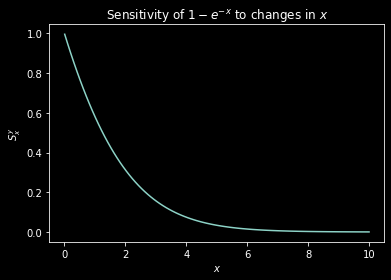

In [11]:
plt.plot(x,x*np.exp(-x)/(1-np.exp(-x)))
plt.xlabel("$x$")
plt.ylabel("$S_x^y$")
plt.title("Sensitivity of $1-e^{-x}$ to changes in $x$");

# Sensitivity of Systems 

You can extend the definition of sensitivity to entire linear I/O systems. Say $T$ is the transfer function for an entire system, and $G$ is a component (i.e. G is a block in the larger block diagram $T$). Then we define 

$$
S_G^T = \frac{\partial T}{\partial G} \frac{G}{T}
$$

the same way we defined sensitivity above. We can use this definition to look at various block diagrams.

# Examples

Example: Open Loop Control
---

In *open loop control* we are controlling a plant $G(s)$ with a controller $G_c(s)$ that just conditions the user's input to $G(s)$ without using $y$. 

<img width=35% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sensitivity-series.png">

Remember that we do not usually have a very good model of the plant, $G(s)$, so we should explore what happens to the overall systems upon small changes to $G(s)$. That is we should look at

$$
S_G^T = \frac{\partial G_c G}{G} \frac{G}{G_c G} = G_c \frac{G}{G_c G} = 1.
$$

In this case we see the overall system is highly sensitive to changes in (or uncertainty about) the plant. This argument shows that open loop control is really not very good.

Example: Feedback
---

Now consider a very simple proportional feedback controller consisting of just a gain block $K$ controlling the plant $G(s)$.

<img width=35% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sensitivity-feedback.png">

We can once again ask: What is the change in the entire system given changes in the plant? The transfer function of the overall system is

$$
T(s) = \frac{KG(s)}{1+KG(s)}
$$

The partial derivative part of expression for sensitivity is

$$
\frac{\partial T}{\partial G} = \frac{(1+KG)K - K^2G}{(1+KG)^2} = \frac{K}{(1+KG)^2}
$$

So

$$
S_G^T = \frac{K}{(1+KG)^2} \frac{G(1+KG)}{KG} = \frac{1}{1+KG}
$$

Here, as $K$ gets big, the sensitivity goes to zero! Said differently, the overall sensitivity of the system to uncertainly about or changes in the plant can be made arbitrarily small by tuning the feedback gain $K$.

Of course, there are tradeoffs:
- A big $K$ will likely make the system very aggressive;
- A big $K$ may result in a large input $u$ to $G(s)$ which may not be realizable by the actual hardware used;
- If there is a sensor for $y$ that has any noise, then $K$ will be multiplying that noise.

Example: Sensitivity to a Parameter
---

You can also look at the sensitivity to changes in a parameter. For example, say that

$$
T(s) = \frac{1}{s+a}
$$

where $a$ is some measured parameter of the system that might change from day to day, or which isn't known very well. Then

$$
S_a^T = \frac{\partial T}{\partial a} \frac{a}{T} = \frac{1}{(s+a)^2} a \frac{s+a}{1} = \frac{a}{s+a}.
$$

In this case we can see that the sensitivity depends on $a$. If $a$ is small, then so is the sensitivity. But as $a$ increases, the sensitivity goes to one.

Example: Sensitivity of Steady State
---

Suppose the input to the above system is the step $U(s) = \frac{1}{s}$. Then 

$$
Y(s) = \frac{1}{s}\frac{1}{s+a}
$$

Using the final value theorem we get that

$$
y^* = \lim_{s \rightarrow 0}s Y(s) = \frac{1}{a}
$$

Thus, the steady state of the system depends on $a$ directly -- so it is highly sensitive to $a$. In particular,

$$
S_a^{y^*} = \frac{\partial (1/a)}{\partial{a}} \frac{a}{1} = -\frac{1}{a}.
$$

Example: Sensitivity to a Parameter with Feedback
---

Now suppose we put the above system in a feedback configuration:

<img width=45% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sensitivity-param.png">

Then 

$$
T(s) = \frac{K}{s+a+K}
$$

and

$$
S_a^T = \frac{-K}{(s+a+K)^2} a \frac{s+a+K}{-K} = \frac{-a}{s+a+K}
$$

which can be made very small by making the tunable parameter $K$ big.

Note that the response of this system to a step input $1/s$ is 

$$
Y(s) = \frac{1}{s}\frac{K}{s+a+K}
$$

which, using the final value theorem, goes to

$$
y(\infty) = \lim_{s \rightarrow 0} s \frac{1}{s}\frac{K}{s+a+K} = \frac{K}{a+K}.
$$

Thus, the final value can be made arbitrarily insensitive to changes in $a$ by tuning $K$.

Example: Sensor Problems
---

Now let's look at a different component, the sensor, which takes the actual $y$ as an input and returns an estimate of $y$. Calling the sensor $H$, we have the following block diagram:

<img width=45% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sensitivity-sensor.png">

The transfer function is

$$
T =\frac{G}{1+GH}
$$

The sensitivity to changes in $H$ is then

$$
S^T_H = \frac{-G^2}{(1+GH)^2} H \frac{1+GH}{G} = - \frac{GH}{1+GH}.
$$

if $GH$ is large, then $S^T_H \approx 1$. In general

> Systems can be very sensitive to sensor noise and uncertainty. 

Sensors are typically the most expensive part of a system for this reason.

# Sensitivity Depends on Frequency



Let's look at the following example in more detail.

<img width=55% src="https://github.com/christakahashi/ECE447/blob/master/images/sensitivity-example.png?raw=1">

Using $T = \frac{G}{1+GH}$ with $G = (K_p + K_ds)/s^2$ and $H=1$, we find that the transfer function is

$$
T(s) = \frac{K_p+K_ds}{s^2+K_ds+K_p}
$$

Similarly to the feedback example above, we can look at the sensitivity of the system to changes in $G$:

$$
S_G^T = \frac{\partial KG}{\partial G} = \frac{1}{1+KG}
$$

Here, $K = K_P + K_ds$, so we get

$$
S_G^T = \frac{1}{1+\frac{K_p + K_ds}{s^2}} = \frac{s^2}{s^2+K_ds+K_p}.
$$

We want $|S_G^T|$ to be small. Let's look at what happens when $s = i \omega$ and $\omega$ varies.

Then

\begin{align}
S_G^T(i\omega) & = \frac{(i\omega)^2}{(i\omega)^2+K_di\omega+K_p} \\
               & = \frac{-\omega^2}{K_p - \omega^2 + K_d i \omega}.
\end{align}

As $\omega \rightarrow 0$, 

$$
S_G^T(i\omega) \rightarrow 0
$$

So that's good.

As $\omega \rightarrow \infty$, 

\begin{align}
\lim_{\omega \rightarrow \infty} S_G^T(i\omega) 
  = \lim_{\omega \rightarrow \infty} \frac{-1}{\frac{K_p}{\omega^2} - 1 + \frac{K_d}{\omega}}
  = 1.
\end{align}


Also, if $K_d = 0$, then

$$
S_G^T = \frac{-\omega^2}{K_p-\omega^2}
$$

which is $\infty$ when $\omega = \sqrt{K_p}$. Therefore, we really need a non-zero $K_d$. 

More generally, you can plot the sensitivity versus frequency to get the following figure. Knowing what frequencies your system will be operating at is crucial.

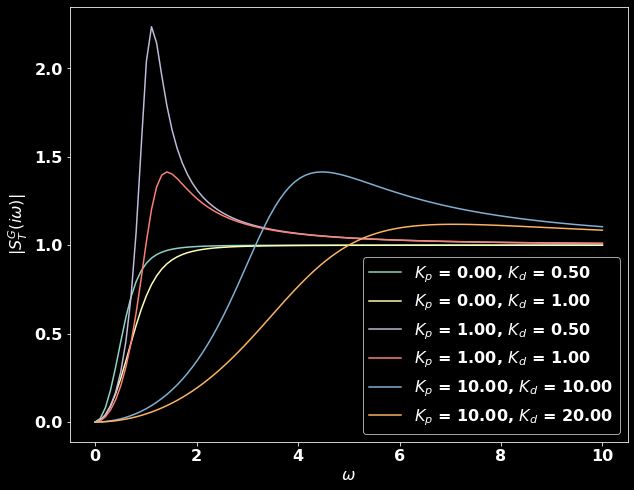

In [16]:
font = {'size'   : 16}

plt.rc('font', **font)

omega = np.linspace(0,10,100)
plt.figure(figsize=(10,8))
for Kp,Kd in [[0,0.5], [0,1], [1,0.5], [1,1], [10,10], [10,20]]:
    STG = -omega**2 / ( Kp - omega**2 + Kd*I )
    plt.plot(omega, np.abs(STG),label="$K_p$ = %.2f, $K_d$ = %.2f" % (Kp,Kd))
plt.xlabel("$\omega$")
plt.ylabel("$|S_T^G(i \omega)|$")
plt.legend();

# Summary

- Sensitivity of a system to a part is defined by $S_G^T = \frac{\partial T}{\partial G}\frac{G}{T}$.
- Open loop is generally not good.
- Closed loop can be good, but you need to understand your frequencies
- Low variability/ noise sensors are crucial 